# Erasmus Neural Networks
http://michalbereta.pl/nn
## RBF Networks (Radial basis function networks)


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### RBF network - class design

https://en.wikipedia.org/wiki/Radial_basis_function_network

```
An input vector x is used as input to all radial basis functions, each with different parameters. The output of the network is a linear combination of the outputs from radial basis functions.
```

In order to calculate the response of `ith` hidden neuron for a given input `x`, in the following code we use the radial function as:

$$ houput[i](x) = e^{-\frac{||x-hcenters[i]||^2}{hsigmas[i]^2}}$$

In [1]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        pass
    def Print(self):#print basic info about the network
        pass
    def Forward(self, inputs):
        pass
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse for the output layer
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model for the output layer
        pass
###############################################################################        

net = RBFNN(3, 4, 2)


### RBF network - constructor

- Weights of the linear output layer are randomly generated (as usual)

- Parameters of radial hidden units are practically uninitialized here, we leave it for later.

In [2]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        pass
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
############################################################################### 
        
net = RBFNN(3, 4, 2)
net.Print()


hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.79915107 0.43202903]
 [0.23919712 0.92511238]
 [0.09358061 0.43474525]
 [0.83272652 0.11498758]]
outbiases:
 [0.06979397 0.18409219]


### RBF network - forward pass, calculating the network responses

First, the responses of radial hidden neurons are calculated. Then, based on them, the network's outputs are calculated as the outputs of linear Widorw-Hoff neurons.

In [3]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
        
ins = np.random.rand(5,3)
net = RBFNN(3, 4, 2)
net.Print()
net.Forward(ins)
print('------------------------')
net.Print() 

 

hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.8038339  0.25128407]
 [0.09788505 0.11461247]
 [0.43927208 0.8789755 ]
 [0.939164   0.59755256]]
outbiases:
 [0.0651079  0.40492051]
------------------------
hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.8038339  0.25128407]
 [0.09788505 0.11461247]
 [0.43927208 0.8789755 ]
 [0.939164   0.59755256]]
outbiases:
 [0.0651079  0.40492051]
houtputs:
 [[0.77725062 0.77725062 0.77725062 0.77725062]
 [0.26166912 0.26166912 0.26166912 0.26166912]
 [0.1961851  0.1961851  0.1961851  0.1961851 ]
 [0.113025   0.113025   0.113025   0.113025  ]
 [0.32249196 0.32249196 0.32249196 0.32249196]]
netoutputs:
 [[1.8373598  1.83694617]
 [0.66175406 0.88702614]
 [0.51244035 0.76637677]
 [0.32282241 0.61316054]
 [0.80043957 0.99908763]]


### RBF network - getting network responses, calculating classification errors and MSE (mean squared error)

In [4]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
        
ins = np.random.rand(5,3)
net = RBFNN(3, 4, 2)
net.Print()
net.Forward(ins)
print('------------------------')
net.Print() 

 

hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.66183239 0.05050024]
 [0.15060127 0.12771217]
 [0.97176983 0.64741816]
 [0.33261618 0.55980809]]
outbiases:
 [0.98287169 0.97948123]
------------------------
hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.66183239 0.05050024]
 [0.15060127 0.12771217]
 [0.97176983 0.64741816]
 [0.33261618 0.55980809]]
outbiases:
 [0.98287169 0.97948123]
houtputs:
 [[0.20909852 0.20909852 0.20909852 0.20909852]
 [0.19191395 0.19191395 0.19191395 0.19191395]
 [0.88038346 0.88038346 0.88038346 0.88038346]
 [0.42514    0.42514    0.42514    0.42514   ]
 [0.37387061 0.37387061 0.37387061 0.37387061]]
netoutputs:
 [[1.42549555 1.2691744 ]
 [1.38911891 1.24536624]
 [2.84648471 2.1991985 ]
 [1.88281641 1.56848662]
 [1.77428835 1.49745603]]


### RBF network - initializing the centres of radial functions based on training data

Radial neurons have to be properly placed in the input space. The idea here is as follows: 

- select randomly a given number of training examples without repetitions, the number equals the number of hidden neurons;

- use the positions of selected training examples as the centers of radial neurons;

- sigma values will be adjusted by trial and error.

<IPython.core.display.Javascript object>


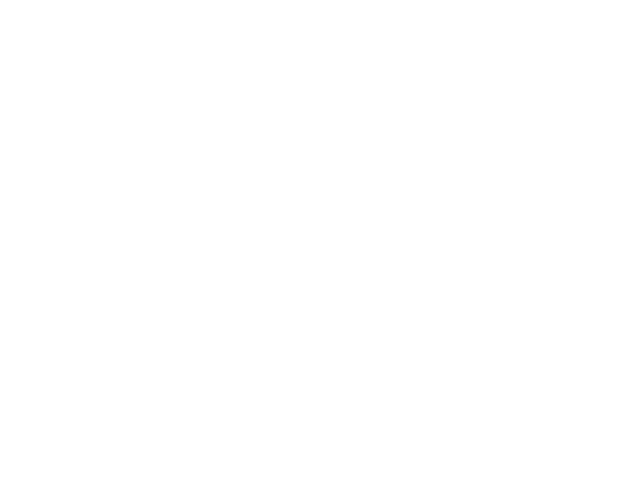

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

<IPython.core.display.Javascript object>


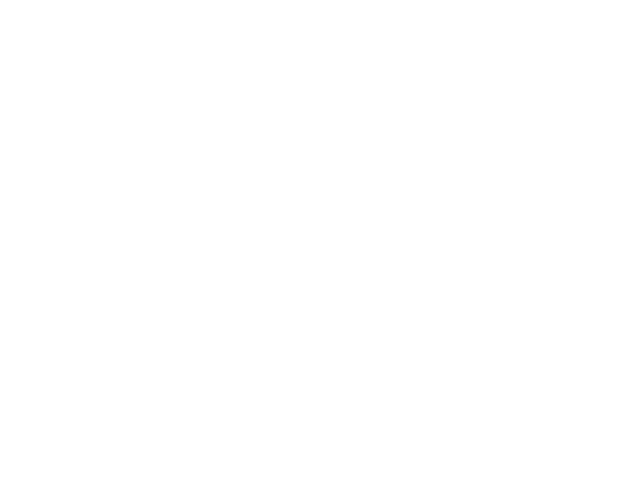

In [5]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 100 #experiment with this value, original:5
sigma = 0.1 #experiment with this value

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Forward(X)
net.Print()

#no training
net.InitCenters(X, sigma)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
plt.show()


### RBF network - train the output layer's weights using matrix pseudo-inverse

Experiment with different numbers of hidden radial neurons and sigma values.

<IPython.core.display.Javascript object>


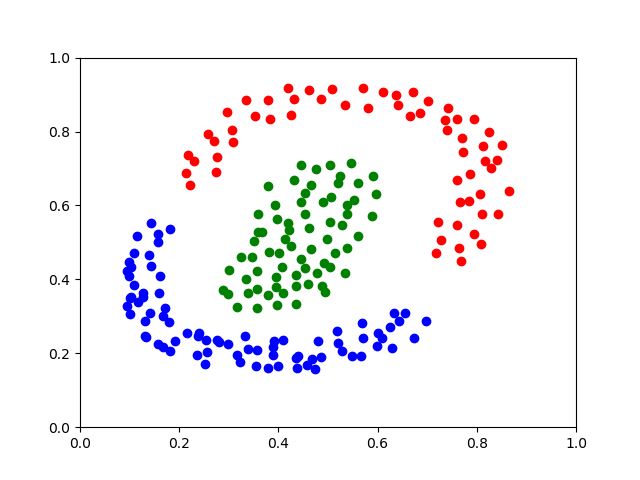

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

MSE after training= 736.9398760872452
Classification error after training= 150
houts max= 0.9342604735772135
out w max= 0.9998268432298497
out w min= 0.000739175357483246


<IPython.core.display.Javascript object>


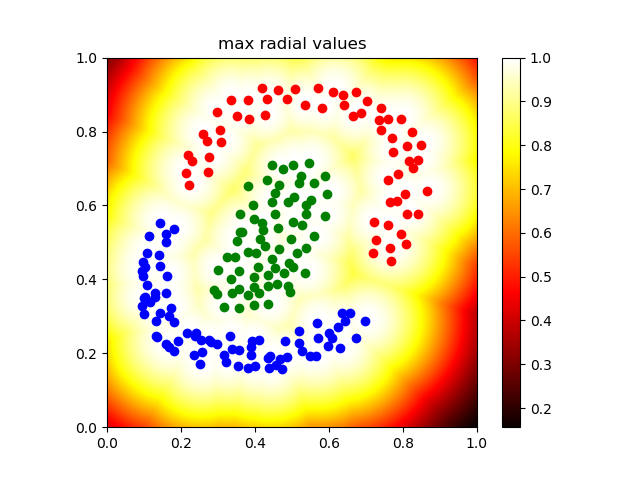

<IPython.core.display.Javascript object>


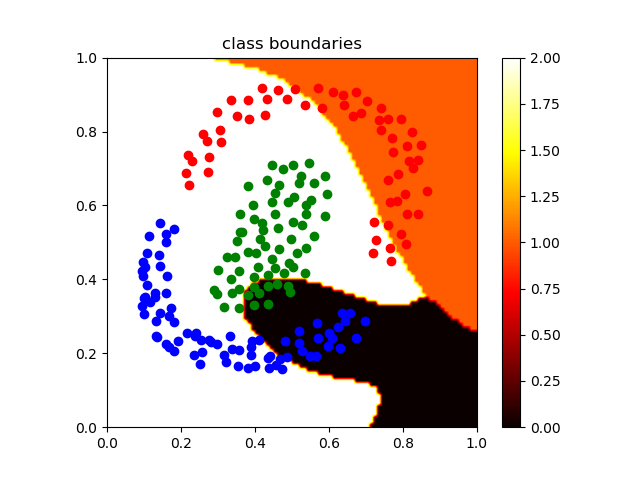

In [6]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        self.InitCenters(X, sigma)
        self.Forward(X)
        #now the matrix pseudoinverse for the weights of the output linear neurons
        r = np.hstack((np.ones((self.houtputs.shape[0], 1)), self.houtputs))
        w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

net = RBFNN(num_of_ins, 100, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))


sigma = 0.3
net.TrainMPInv(X, dtrain, sigma)

net.Forward(X)
#net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()



### RBF network - train the output layer's weights using iterative algorithm (Widrow-Hoff, delta rule)

Note the division in:

```
self.outweights += eta*np.dot(self.houtputs.T, d - self.netoutputs)/X.shape[0]
self.outbiases += eta*np.dot(np.ones((1,self.houtputs.shape[0])), d - self.netoutputs).flatten()/X.shape[0]
```

The devision is done to avoid too strong gradients, when the number of training examples is huge.



<IPython.core.display.Javascript object>


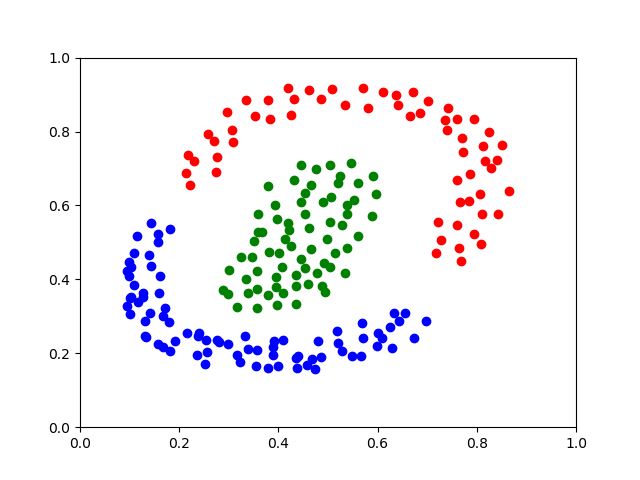

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
outweights:
 [[0.72632745 0.32675384 0.36791632]
 [0.79375922 0.05391995 0.76100646]
 [0.5661827  0.47665171 0.67377739]
 [0.27741208 0.23131714 0.26169087]
 [0.8895224  0.74595174 0.49456053]
 [0.05464142 0.042103   0.4130719 ]
 [0.9740533  0.26965026 0.92505406]
 [0.14548196 0.66218772 0.2447355 ]
 [0.84395205 0.04677975 0.13070397]
 [0.36039279 0.62227761 0.59661379]
 [0.56917303 0.17822569 0.65895585]
 [0.90402112 0.3781525  0.6611837 ]
 [0.47929504 0.75783916 0.71797645]
 [0.71052533 0.43303117 0.65659557]
 [0.22631725 0.70299659 0.33418034]
 [0.85194588 0.94938015 0.80298257]
 [0.69819966 0.69831591 0.62343483]
 [0.85680946 0.7849923

mse= 0.47565215694544477
classification_error= 5

mse= 0.46900621909280266
classification_error= 5

mse= 0.46260922249630554
classification_error= 5

mse= 0.45644648821515443
classification_error= 5

mse= 0.4505045919826507
classification_error= 5

mse= 0.44477122136025476
classification_error= 5

mse= 0.4392350533528687
classification_error= 5

mse= 0.4338856489806239
classification_error= 5

mse= 0.42871336198471466
classification_error= 5

mse= 0.4237092593814726
classification_error= 5

mse= 0.4188650520034395
classification_error= 5

mse= 0.4141730335039099
classification_error= 5

mse= 0.4096260265713909
classification_error= 5

mse= 0.40521733531729737
classification_error= 5

mse= 0.4009407029752099
classification_error= 5

mse= 0.39679027419189405
classification_error= 5

mse= 0.39276056130579634
classification_error= 5

mse= 0.3888464141032061
classification_error= 5

mse= 0.3850429926198803
classification_error= 5

mse= 0.3813457426199678
classification_error= 5

mse= 0.3777

<IPython.core.display.Javascript object>


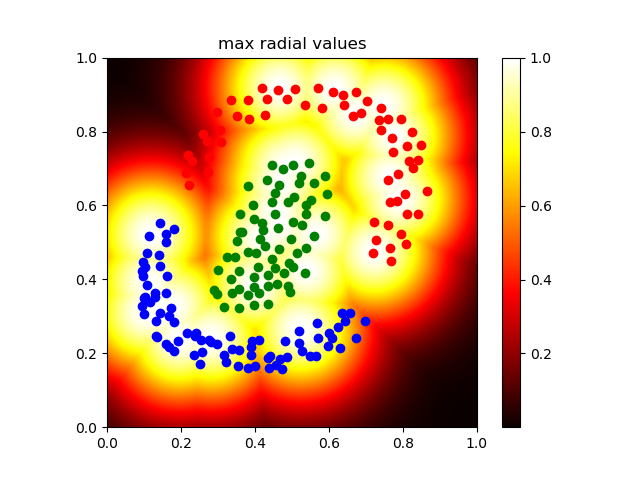

<IPython.core.display.Javascript object>


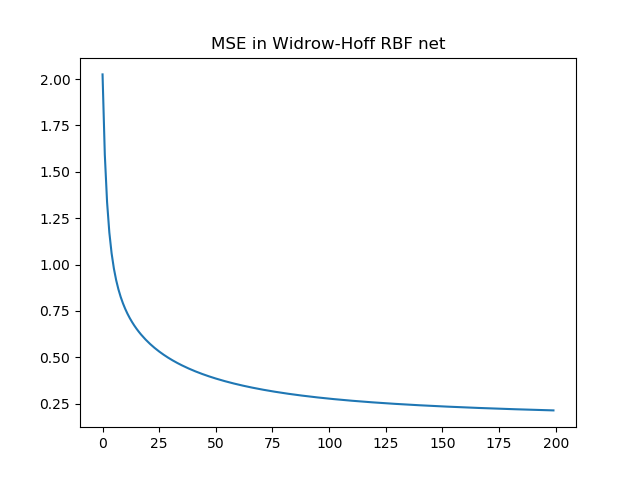

<IPython.core.display.Javascript object>


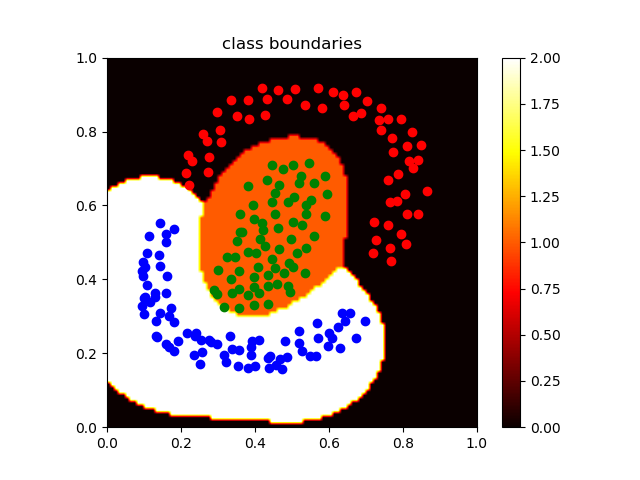

In [7]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        self.InitCenters(X, sigma)
        self.Forward(X)
        #now the matrix pseudoinverse for the weights of the output linear neurons
        r = np.hstack((np.ones((self.houtputs.shape[0], 1)), self.houtputs))
        w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model, delta rule
        self.InitCenters(X, sigma)
        self.Forward(X)
        self.stats = []
        for i in range(max_iters):
            self.outweights += eta*np.dot(self.houtputs.T, d - self.netoutputs)/X.shape[0]
            self.outbiases += eta*np.dot(np.ones((1,self.houtputs.shape[0])), d - self.netoutputs).flatten()/X.shape[0]
            self.Forward(X)
            mse = self.GetMSE(d)
            self.stats.append(mse)
            print('mse=',mse)
            classification_error = self.GetClassificationError(labels)
            print('classification_error=',classification_error)
            print()            
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 25 #experiment with this value, original : 100, 50
sigma = 0.2 #experiment with this value, original : 0.1, 0.08

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.5, 200) 
#epoch : 200, 100
#lr : 0.05, 0.5


net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
if net.stats != None:
    plt.figure()
    plt.title('MSE in Widrow-Hoff RBF net')
    plt.plot(net.stats)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()


### Task 1

- Use the previous example code.

- Experiment with different settings: number of hidden neurons, number of epoch, eta and sigma values. 

- What is the minimum number of hidden units you can find, so that the learning is still possible? What are the settings?

- Write your answers and comments below.

### YOUR ANSWERS GO IN THIS CELL

I managed to get the correct classification by using only 25 hidden
units, a standard deviation of 0.2, a learning rate of 0.5 and 200 epochs.

### Task 2

- Use the RBF network for iris dataset.

- Find the best settings (number of hidden neurons, sigma values, eta and epochs)

- What are the best results (classification rates)?

- Does the matrix psudo-inverse work for this data?

- Remeber about normalizing the inputs

### YOUR ANSWERS AND COMMENTS HERE

Without normalizing the inputs after 200 epochs I got 23 errors with a learning rate of 0.1 and 0 errors with a learning rate of 0.5. With normalization I got only 3 errors after 200 epochs with a learning rate of 0.1.
I'm using 150 hidden units and a standard deviation of 0.2.

The matrix psudo-inverse doesn't seem to work for this data, because after training it gets still 91 errors (see below).



In [8]:
# Normalization of data

def normalize_divide_max(data):
    maxs = np.amax(np.abs(data), axis=0)
    return data / maxs

In [15]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import pandas as pd

data = pd.read_csv("iris.csv", delimiter="\t", header=None).as_matrix()
X = np.array(data[:,:4]).astype("float")
d = np.array(data[:,4])

X=normalize_divide_max(X)

print(X)

dict={"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

d[d == "Iris-setosa"] = dict['Iris-setosa']
d[d == "Iris-versicolor"] = dict['Iris-versicolor']
d[d == "Iris-virginica"] = dict['Iris-virginica']

print(d)

num_of_cls = 3 #number of classes
num_of_ins = len(X[0]) #number of inputs

print("size=", num_of_cls, num_of_ins)

dtrain = encode_labels_as_binary(d.astype(int), num_of_cls) 

print(dtrain)

[[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]
 [0.6835443  0.88636364 0.24637681 0.16      ]
 [0.58227848 0.77272727 0.20289855 0.12      ]
 [0.63291139 0.77272727 0.2173913  0.08      ]
 [0.55696203 0.65909091 0.20289855 0.08      ]
 [0.62025316 0.70454545 0.2173913  0.04      ]
 [0.6835443  0.84090909 0.2173913  0.08      ]
 [0.60759494 0.77272727 0.23188406 0.08      ]
 [0.60759494 0.68181818 0.20289855 0.04      ]
 [0.5443038  0.68181818 0.15942029 0.04      ]
 [0.73417722 0.90909091 0.17391304 0.08      ]
 [0.72151899 1.         0.2173913  0.16      ]
 [0.6835443  0.88636364 0.1884058  0.16      ]
 [0.64556962 0.79545455 0.20289855 0.12      ]
 [0.72151899 0.86363636 0.24637681 0.12      ]
 [0.64556962 0.86363636 0.2173913  0.12      ]
 [0.6835443  0.77272727 0.24637681 0.08      ]
 [0.64556962 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [16]:
#num_of_cls = len(set(d))
#num_of_ins = X.shape[1]

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 150 #experiment with this value, original : 100, 50, 25
sigma = 0.2 #experiment with this value, original : 0.1, 0.08, 0.2

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.1, 200) 
#epoch : 200, 100
#lr : 0.05, 0.5


net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())




hcenters:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]

mse= 0.45427551760273455
classification_error= 6

mse= 0.45048843376258824
classification_error= 6

mse= 0.44687812340064664
classification_error= 6

mse= 0.4434257117508511
classification_error= 6

mse= 0.4401149792969303
classification_error= 6

mse= 0.4369319603068122
classification_error= 6

mse= 0.4338646033997617
classification_error= 6

mse= 0.43090248448087154
classification_error= 6

mse= 0.4280365638911644
classification_error= 6

mse= 0.42525898089652364
classification_error= 6

mse= 0.42256287971319345
classification_error= 6

mse= 0.41994226217352754
classification_error= 6

mse= 0.41739186289965574
classification_error= 6

mse= 0.4149070434971518
classification_error= 6

mse= 0.4124837028244132
classification_error= 6

mse= 0.410118200852107
classification_error= 6

mse= 0.4078072940140342
classification_error= 6

mse= 0.4055480802773017
classification_error= 6

mse= 0.4033379524352689
classification_error= 6

mse= 0.4011745583592861
classification_error= 6

mse= 0.399055

In [21]:
hidden_num = 150 #experiment with this value, original : 100, 50, 25
sigma = 0.2 #experiment with this value, original : 0.1, 0.08, 0.2

net2 = RBFNN(num_of_ins, hidden_num, num_of_cls)
net2.Print()
net2.Forward(X)
net2.Print()
print('MSE before training=',net2.GetMSE(dtrain))
print('Classification error before training=',net2.GetClassificationError(d)) 

net2.TrainMPInv(X, dtrain, sigma)
net2.Forward(X)
net2.Print()
print('MSE after training=',net2.GetMSE(dtrain))
print('Classification error after training=',net2.GetClassificationError(d))


hcenters:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]

### Task 3

- Use the RBF network for pima-diabetes dataset. There are two classes, the last column indicates the class.

- Find the best settings (number of hidden neurons, sigma values, eta and epochs)

- What are the best results (classification rates)?

- Does the matrix psudo-inverse work for this data?

- Use also MCPerceptron class (or your implementation of Widrow-Hoff model) as a linear model. Compare the results.

### YOUR ANSWERS AND COMMENTS HERE

With normalization of data, I managed to get 20 errors with a learning rate of 0.7, 700 hidden units, 4900 epochs and a standard deviation of 0.06.
The matrix psudo-inverse doesn't seem to work for this data, because after training it gets still 314 errors (see below).

In [22]:

    
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import pandas as pd

data = pd.read_csv("pima-diabetes.csv", delimiter=",", header=None).as_matrix()
X = np.array(data[:,:len(data[0])-1]).astype("float")
d = np.array(data[:,len(data[0])-1])

X=normalize_divide_max(X) 

print("set=", set(d))

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print("size=", num_of_cls, num_of_ins)

dtrain = encode_labels_as_binary(d.astype(int), num_of_cls) 

print(dtrain)

hidden_num = 700 #experiment with this value, original : 100, 50, 25
sigma = 0.06 #experiment with this value, original : 0.1, 0.08, 0.2

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.7, 4900) 
#epoch : 200, 100, 500
#lr : 0.05, 0.5, 0.9


net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


set= {0.0, 1.0}
size= 2 8
[[-1.  1.]
 [ 1. -1.]
 [-1.  1.]
 ...
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]]
hcenters:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

mse= 1.8296300955984393
classification_error= 255

mse= 1.8265331206132658
classification_error= 254

mse= 1.8234422158996118
classification_error= 252

mse= 1.8203573690503214
classification_error= 251

mse= 1.8172785676849836
classification_error= 251

mse= 1.8142057994498713
classification_error= 251

mse= 1.8111390520178776
classification_error= 251

mse= 1.8080783130884566
classification_error= 251

mse= 1.8050235703875626
classification_error= 250

mse= 1.8019748116675867
classification_error= 250

mse= 1.798932024707298
classification_error= 249

mse= 1.795895197311782
classification_error= 248

mse= 1.7928643173123813
classification_error= 248

mse= 1.789839372566633
classification_error= 247

mse= 1.7868203509582112
classification_error= 246

mse= 1.7838072403968646
classification_error= 246

mse= 1.7808000288183579
classification_error= 245

mse= 1.7777987041844103
classification_error= 243

mse= 1.774803254482639
classification_error= 243

mse= 1.7718136677264973
classificat

mse= 1.3923800239716
classification_error= 176

mse= 1.3901347387815235
classification_error= 174

mse= 1.3878937974476244
classification_error= 173

mse= 1.3856571912435374
classification_error= 173

mse= 1.3834249114612798
classification_error= 172

mse= 1.3811969494112093
classification_error= 172

mse= 1.378973296421983
classification_error= 171

mse= 1.376753943840517
classification_error= 171

mse= 1.3745388830319438
classification_error= 169

mse= 1.3723281053795755
classification_error= 169

mse= 1.3701216022848577
classification_error= 168

mse= 1.3679193651673331
classification_error= 168

mse= 1.3657213854646006
classification_error= 168

mse= 1.363527654632273
classification_error= 168

mse= 1.3613381641439377
classification_error= 167

mse= 1.3591529054911178
classification_error= 165

mse= 1.35697187018323
classification_error= 165

mse= 1.3547950497475465
classification_error= 165

mse= 1.3526224357291525
classification_error= 164

mse= 1.3504540196909103
classification_

mse= 1.0747755547357327
classification_error= 90

mse= 1.0731413149735978
classification_error= 89

mse= 1.071510200397648
classification_error= 88

mse= 1.0698822048236354
classification_error= 88

mse= 1.0682573220800746
classification_error= 88

mse= 1.0666355460082155
classification_error= 88

mse= 1.0650168704620167
classification_error= 88

mse= 1.063401289308115
classification_error= 88

mse= 1.061788796425801
classification_error= 86

mse= 1.0601793857069897
classification_error= 86

mse= 1.0585730510561924
classification_error= 86

mse= 1.0569697863904912
classification_error= 86

mse= 1.0553695856395102
classification_error= 86

mse= 1.0537724427453894
classification_error= 85

mse= 1.0521783516627552
classification_error= 85

mse= 1.050587306358696
classification_error= 84

mse= 1.048999300812733
classification_error= 84

mse= 1.0474143290167943
classification_error= 83

mse= 1.0458323849751878
classification_error= 82

mse= 1.0442534627045734
classification_error= 82

mse= 

mse= 0.8408333983252009
classification_error= 34

mse= 0.8396442671334251
classification_error= 33

mse= 0.8384573859315393
classification_error= 32

mse= 0.8372727503258787
classification_error= 32

mse= 0.8360903559316827
classification_error= 32

mse= 0.8349101983730763
classification_error= 32

mse= 0.8337322732830512
classification_error= 32

mse= 0.8325565763034465
classification_error= 32

mse= 0.8313831030849294
classification_error= 32

mse= 0.8302118492869782
classification_error= 32

mse= 0.8290428105778611
classification_error= 32

mse= 0.8278759826346205
classification_error= 32

mse= 0.826711361143051
classification_error= 32

mse= 0.8255489417976838
classification_error= 30

mse= 0.8243887203017657
classification_error= 30

mse= 0.8232306923672427
classification_error= 30

mse= 0.8220748537147397
classification_error= 29

mse= 0.8209212000735433
classification_error= 29

mse= 0.8197697271815828
classification_error= 29

mse= 0.818620430785412
classification_error= 29

ms

mse= 0.6694781461359343
classification_error= 27

mse= 0.6686117260636913
classification_error= 27

mse= 0.6677469293171819
classification_error= 27

mse= 0.6668837527630568
classification_error= 27

mse= 0.6660221932742175
classification_error= 27

mse= 0.6651622477298013
classification_error= 27

mse= 0.6643039130151694
classification_error= 27

mse= 0.663447186021893
classification_error= 27

mse= 0.6625920636477415
classification_error= 27

mse= 0.6617385427966685
classification_error= 27

mse= 0.6608866203788
classification_error= 27

mse= 0.6600362933104201
classification_error= 27

mse= 0.6591875585139602
classification_error= 27

mse= 0.6583404129179841
classification_error= 27

mse= 0.6574948534571766
classification_error= 27

mse= 0.6566508770723306
classification_error= 27

mse= 0.6558084807103338
classification_error= 27

mse= 0.6549676613241565
classification_error= 27

mse= 0.6541284158728392
classification_error= 27

mse= 0.6532907413214789
classification_error= 27

mse=

mse= 0.5463532944690943
classification_error= 27

mse= 0.5457165614415956
classification_error= 27

mse= 0.5450810105170425
classification_error= 27

mse= 0.5444466394363564
classification_error= 27

mse= 0.5438134459449037
classification_error= 27

mse= 0.543181427792486
classification_error= 27

mse= 0.5425505827333321
classification_error= 27

mse= 0.5419209085260878
classification_error= 27

mse= 0.5412924029338072
classification_error= 27

mse= 0.5406650637239444
classification_error= 27

mse= 0.5400388886683437
classification_error= 27

mse= 0.5394138755432308
classification_error= 27

mse= 0.5387900221292041
classification_error= 27

mse= 0.5381673262112255
classification_error= 27

mse= 0.5375457855786118
classification_error= 27

mse= 0.5369253980250254
classification_error= 27

mse= 0.5363061613484658
classification_error= 27

mse= 0.5356880733512601
classification_error= 27

mse= 0.5350711318400555
classification_error= 27

mse= 0.5344553346258089
classification_error= 27

m

mse= 0.4552803390687721
classification_error= 27

mse= 0.4548119655937111
classification_error= 27

mse= 0.45434445383651845
classification_error= 27

mse= 0.45387780216485846
classification_error= 27

mse= 0.45341200894956896
classification_error= 27

mse= 0.4529470725646549
classification_error= 27

mse= 0.45248299138728204
classification_error= 27

mse= 0.4520197637977705
classification_error= 27

mse= 0.4515573881795884
classification_error= 27

mse= 0.45109586291934556
classification_error= 27

mse= 0.4506351864067873
classification_error= 27

mse= 0.4501753570347881
classification_error= 27

mse= 0.449716373199345
classification_error= 27

mse= 0.44925823329957176
classification_error= 27

mse= 0.44880093573769253
classification_error= 27

mse= 0.44834447891903517
classification_error= 27

mse= 0.44788886125202554
classification_error= 27

mse= 0.4474340811481811
classification_error= 27

mse= 0.44698013702210465
classification_error= 27

mse= 0.44652702729147803
classification_e

mse= 0.389240610487195
classification_error= 27

mse= 0.3888932244640224
classification_error= 27

mse= 0.3885464718209504
classification_error= 27

mse= 0.3882003513673899
classification_error= 27

mse= 0.38785486191504254
classification_error= 27

mse= 0.387510002277897
classification_error= 27

mse= 0.3871657712722241
classification_error= 27

mse= 0.386822167716572
classification_error= 27

mse= 0.3864791904317621
classification_error= 27

mse= 0.38613683824088413
classification_error= 27

mse= 0.3857951099692925
classification_error= 27

mse= 0.3854540044446006
classification_error= 27

mse= 0.3851135204966769
classification_error= 27

mse= 0.38477365695764115
classification_error= 27

mse= 0.3844344126618586
classification_error= 27

mse= 0.38409578644593684
classification_error= 27

mse= 0.38375777714872
classification_error= 27

mse= 0.38342038361128594
classification_error= 27

mse= 0.3830836046769403
classification_error= 27

mse= 0.3827474391912129
classification_error= 27



mse= 0.3394229705883775
classification_error= 27

mse= 0.33916600603067765
classification_error= 27

mse= 0.33890950545923504
classification_error= 27

mse= 0.33865346800802604
classification_error= 27

mse= 0.3383978928126788
classification_error= 27

mse= 0.3381427790104699
classification_error= 27

mse= 0.3378881257403208
classification_error= 27

mse= 0.33763393214279497
classification_error= 27

mse= 0.3373801973600945
classification_error= 27

mse= 0.33712692053605703
classification_error= 27

mse= 0.3368741008161524
classification_error= 27

mse= 0.3366217373474793
classification_error= 27

mse= 0.33636982927876274
classification_error= 27

mse= 0.3361183757603499
classification_error= 27

mse= 0.33586737594420796
classification_error= 27

mse= 0.33561682898392026
classification_error= 27

mse= 0.33536673403468314
classification_error= 27

mse= 0.33511709025330316
classification_error= 27

mse= 0.3348678967981938
classification_error= 27

mse= 0.33461915282937227
classification_

mse= 0.3027111442310881
classification_error= 27

mse= 0.30252014389481036
classification_error= 27

mse= 0.3023294848020606
classification_error= 27

mse= 0.30213916632000665
classification_error= 27

mse= 0.30194918781701335
classification_error= 27

mse= 0.30175954866264093
classification_error= 27

mse= 0.3015702482276423
classification_error= 27

mse= 0.3013812858839607
classification_error= 27

mse= 0.3011926610047276
classification_error= 27

mse= 0.30100437296426025
classification_error= 27

mse= 0.30081642113805923
classification_error= 27

mse= 0.3006288049028068
classification_error= 27

mse= 0.3004415236363638
classification_error= 27

mse= 0.3002545767177678
classification_error= 27

mse= 0.3000679635272308
classification_error= 27

mse= 0.2998816834461369
classification_error= 27

mse= 0.29969573585704024
classification_error= 27

mse= 0.299510120143662
classification_error= 27

mse= 0.29932483569088936
classification_error= 27

mse= 0.29913988188477214
classification_err

mse= 0.2755241324588274
classification_error= 27

mse= 0.275381438553834
classification_error= 27

mse= 0.27523899656425166
classification_error= 27

mse= 0.2750968060257028
classification_error= 27

mse= 0.2749548664746824
classification_error= 27

mse= 0.27481317744855677
classification_error= 27

mse= 0.274671738485561
classification_error= 27

mse= 0.27453054912479774
classification_error= 27

mse= 0.2743896089062361
classification_error= 27

mse= 0.27424891737070883
classification_error= 27

mse= 0.27410847405991157
classification_error= 27

mse= 0.2739682785164009
classification_error= 27

mse= 0.27382833028359244
classification_error= 27

mse= 0.27368862890575973
classification_error= 27

mse= 0.2735491739280322
classification_error= 27

mse= 0.27340996489639363
classification_error= 27

mse= 0.2732710013576804
classification_error= 27

mse= 0.2731322828595802
classification_error= 27

mse= 0.27299380895062986
classification_error= 27

mse= 0.27285557918021436
classification_err

mse= 0.2550711307119602
classification_error= 27

mse= 0.2549643144408902
classification_error= 27

mse= 0.2548576841304425
classification_error= 27

mse= 0.2547512394398033
classification_error= 27

mse= 0.2546449800287954
classification_error= 27

mse= 0.25453890555787656
classification_error= 27

mse= 0.25443301568813875
classification_error= 27

mse= 0.2543273100813068
classification_error= 27

mse= 0.25422178839973714
classification_error= 27

mse= 0.2541164503064165
classification_error= 27

mse= 0.25401129546496093
classification_error= 27

mse= 0.25390632353961445
classification_error= 27

mse= 0.253801534195248
classification_error= 27

mse= 0.2536969270973581
classification_error= 27

mse= 0.25359250191206556
classification_error= 27

mse= 0.2534882583061147
classification_error= 27

mse= 0.25338419594687184
classification_error= 27

mse= 0.25328031450232397
classification_error= 27

mse= 0.2531766136410782
classification_error= 27

mse= 0.25307309303235975
classification_err

mse= 0.2397297962903028
classification_error= 27

mse= 0.23964948627455163
classification_error= 27

mse= 0.23956931377198054
classification_error= 27

mse= 0.23948927853200708
classification_error= 27

mse= 0.23940938030451409
classification_error= 27

mse= 0.23932961883984885
classification_error= 27

mse= 0.23924999388882218
classification_error= 27

mse= 0.23917050520270774
classification_error= 27

mse= 0.23909115253324095
classification_error= 27

mse= 0.23901193563261822
classification_error= 27

mse= 0.238932854253496
classification_error= 27

mse= 0.23885390814899007
classification_error= 27

mse= 0.2387750970726745
classification_error= 27

mse= 0.2386964207785809
classification_error= 27

mse= 0.23861787902119747
classification_error= 27

mse= 0.23853947155546815
classification_error= 27

mse= 0.2384611981367919
classification_error= 27

mse= 0.23838305852102168
classification_error= 27

mse= 0.2383050524644635
classification_error= 27

mse= 0.23822717972387597
classificatio

mse= 0.22822883496062693
classification_error= 27

mse= 0.22816803964976895
classification_error= 27

mse= 0.22810734638819083
classification_error= 27

mse= 0.22804675499100946
classification_error= 27

mse= 0.22798626527368346
classification_error= 27

mse= 0.22792587705201237
classification_error= 27

mse= 0.22786559014213603
classification_error= 27

mse= 0.22780540436053398
classification_error= 27

mse= 0.22774531952402488
classification_error= 27

mse= 0.22768533544976574
classification_error= 27

mse= 0.22762545195525127
classification_error= 27

mse= 0.22756566885831353
classification_error= 27

mse= 0.2275059859771209
classification_error= 27

mse= 0.22744640313017772
classification_error= 27

mse= 0.22738692013632358
classification_error= 27

mse= 0.2273275368147327
classification_error= 27

mse= 0.22726825298491318
classification_error= 27

mse= 0.22720906846670674
classification_error= 27

mse= 0.22714998308028753
classification_error= 27

mse= 0.22709099664616206
classifi

mse= 0.21954468693305448
classification_error= 27

mse= 0.2194983095699196
classification_error= 27

mse= 0.21945200820871139
classification_error= 27

mse= 0.21940578271256742
classification_error= 27

mse= 0.21935963294487704
classification_error= 27

mse= 0.21931355876928094
classification_error= 27

mse= 0.2192675600496702
classification_error= 27

mse= 0.21922163665018668
classification_error= 27

mse= 0.2191757884352218
classification_error= 27

mse= 0.21913001526941633
classification_error= 27

mse= 0.21908431701766007
classification_error= 27

mse= 0.21903869354509112
classification_error= 27

mse= 0.21899314471709563
classification_error= 27

mse= 0.2189476703993073
classification_error= 27

mse= 0.2189022704576067
classification_error= 27

mse= 0.21885694475812123
classification_error= 27

mse= 0.21881169316722424
classification_error= 27

mse= 0.21876651555153473
classification_error= 27

mse= 0.21872141177791704
classification_error= 27

mse= 0.21867638171348014
classificat

mse= 0.2128983855680584
classification_error= 27

mse= 0.21286275532085056
classification_error= 27

mse= 0.2128271817811368
classification_error= 27

mse= 0.21279166484746495
classification_error= 27

mse= 0.21275620441856877
classification_error= 27

mse= 0.21272080039336735
classification_error= 27

mse= 0.21268545267096495
classification_error= 27

mse= 0.21265016115065047
classification_error= 27

mse= 0.21261492573189714
classification_error= 27

mse= 0.2125797463143625
classification_error= 27

mse= 0.21254462279788747
classification_error= 27

mse= 0.21250955508249647
classification_error= 27

mse= 0.212474543068397
classification_error= 27

mse= 0.21243958665597917
classification_error= 27

mse= 0.21240468574581542
classification_error= 27

mse= 0.21236984023866023
classification_error= 27

mse= 0.21233505003544972
classification_error= 27

mse= 0.2123003150373013
classification_error= 27

mse= 0.21226563514551353
classification_error= 27

mse= 0.21223101026156535
classificati

mse= 0.20780009460451968
classification_error= 27

mse= 0.2077724481387229
classification_error= 27

mse= 0.2077448441446943
classification_error= 27

mse= 0.20771728254699584
classification_error= 27

mse= 0.20768976327032718
classification_error= 27

mse= 0.2076622862395253
classification_error= 27

mse= 0.20763485137956397
classification_error= 27

mse= 0.20760745861555407
classification_error= 27

mse= 0.20758010787274295
classification_error= 27

mse= 0.20755279907651394
classification_error= 27

mse= 0.2075255321523868
classification_error= 27

mse= 0.20749830702601688
classification_error= 27

mse= 0.207471123623195
classification_error= 27

mse= 0.20744398186984744
classification_error= 27

mse= 0.20741688169203532
classification_error= 27

mse= 0.20738982301595466
classification_error= 27

mse= 0.2073628057679359
classification_error= 27

mse= 0.20733582987444396
classification_error= 27

mse= 0.20730889526207755
classification_error= 27

mse= 0.2072820018575693
classification

mse= 0.20376147718273105
classification_error= 27

mse= 0.2037399118633393
classification_error= 27

mse= 0.20371837825591407
classification_error= 27

mse= 0.20369687630459735
classification_error= 27

mse= 0.20367540595363243
classification_error= 27

mse= 0.20365396714736397
classification_error= 27

mse= 0.20363255983023754
classification_error= 27

mse= 0.2036111839467997
classification_error= 27

mse= 0.20358983944169753
classification_error= 27

mse= 0.2035685262596788
classification_error= 27

mse= 0.20354724434559146
classification_error= 27

mse= 0.2035259936443835
classification_error= 27

mse= 0.2035047741011031
classification_error= 27

mse= 0.2034835856608979
classification_error= 27

mse= 0.2034624282690153
classification_error= 27

mse= 0.2034413018708021
classification_error= 27

mse= 0.2034202064117041
classification_error= 27

mse= 0.2033991418372664
classification_error= 27

mse= 0.20337810809313273
classification_error= 27

mse= 0.20335710512504557
classification_e

mse= 0.20057702926301393
classification_error= 27

mse= 0.20056003371446998
classification_error= 27

mse= 0.20054306186462445
classification_error= 27

mse= 0.2005261136721397
classification_error= 27

mse= 0.20050918909575302
classification_error= 27

mse= 0.2004922880942761
classification_error= 27

mse= 0.20047541062659527
classification_error= 27

mse= 0.200458556651671
classification_error= 27

mse= 0.20044172612853808
classification_error= 27

mse= 0.20042491901630535
classification_error= 27

mse= 0.20040813527415555
classification_error= 27

mse= 0.20039137486134515
classification_error= 27

mse= 0.20037463773720435
classification_error= 27

mse= 0.20035792386113682
classification_error= 27

mse= 0.20034123319261968
classification_error= 27

mse= 0.20032456569120313
classification_error= 27

mse= 0.20030792131651065
classification_error= 27

mse= 0.20029130002823856
classification_error= 27

mse= 0.20027470178615614
classification_error= 27

mse= 0.20025812655010533
classifica

mse= 0.19806511865564735
classification_error= 27

mse= 0.198051525188823
classification_error= 27

mse= 0.19803794951758813
classification_error= 27

mse= 0.1980243916112562
classification_error= 27

mse= 0.19801085143919603
classification_error= 27

mse= 0.19799732897083136
classification_error= 27

mse= 0.19798382417564112
classification_error= 27

mse= 0.19797033702315917
classification_error= 27

mse= 0.19795686748297417
classification_error= 27

mse= 0.19794341552472958
classification_error= 27

mse= 0.19792998111812335
classification_error= 27

mse= 0.19791656423290815
classification_error= 27

mse= 0.197903164838891
classification_error= 27

mse= 0.19788978290593318
classification_error= 27

mse= 0.19787641840395043
classification_error= 27

mse= 0.1978630713029124
classification_error= 27

mse= 0.19784974157284294
classification_error= 27

mse= 0.1978364291838197
classification_error= 27

mse= 0.1978231341059743
classification_error= 27

mse= 0.19780985630949202
classification

mse= 0.19603093025370275
classification_error= 27

mse= 0.196019909055937
classification_error= 27

mse= 0.19600890124612713
classification_error= 27

mse= 0.19599790680150408
classification_error= 27

mse= 0.19598692569933962
classification_error= 27

mse= 0.1959759579169463
classification_error= 27

mse= 0.1959650034316772
classification_error= 27

mse= 0.19595406222092607
classification_error= 27

mse= 0.19594313426212717
classification_error= 27

mse= 0.19593221953275516
classification_error= 27

mse= 0.19592131801032506
classification_error= 27

mse= 0.19591042967239214
classification_error= 27

mse= 0.19589955449655191
classification_error= 27

mse= 0.19588869246044008
classification_error= 27

mse= 0.19587784354173232
classification_error= 27

mse= 0.19586700771814444
classification_error= 27

mse= 0.19585618496743187
classification_error= 27

mse= 0.19584537526739024
classification_error= 27

mse= 0.19583457859585476
classification_error= 27

mse= 0.19582379493070032
classifica

mse= 0.19439619551980422
classification_error= 27

mse= 0.19438708286158154
classification_error= 27

mse= 0.1943779803696869
classification_error= 27

mse= 0.19436888802711128
classification_error= 27

mse= 0.19435980581687592
classification_error= 27

mse= 0.19435073372203257
classification_error= 27

mse= 0.19434167172566288
classification_error= 27

mse= 0.19433261981087901
classification_error= 27

mse= 0.194323577960823
classification_error= 27

mse= 0.19431454615866695
classification_error= 27

mse= 0.19430552438761314
classification_error= 27

mse= 0.19429651263089356
classification_error= 27

mse= 0.1942875108717704
classification_error= 27

mse= 0.19427851909353536
classification_error= 27

mse= 0.19426953727951013
classification_error= 27

mse= 0.19426056541304612
classification_error= 27

mse= 0.19425160347752432
classification_error= 27

mse= 0.19424265145635547
classification_error= 27

mse= 0.1942337093329798
classification_error= 27

mse= 0.19422477709086708
classificat

mse= 0.1918726924060052
classification_error= 27

mse= 0.19186614972512614
classification_error= 27

mse= 0.1918596129897603
classification_error= 27

mse= 0.1918530821903898
classification_error= 27

mse= 0.19184655731751335
classification_error= 27

mse= 0.19184003836164656
classification_error= 27

mse= 0.19183352531332168
classification_error= 27

mse= 0.1918270181630877
classification_error= 27

mse= 0.19182051690151022
classification_error= 27

mse= 0.19181402151917148
classification_error= 27

mse= 0.19180753200667047
classification_error= 27

mse= 0.1918010483546225
classification_error= 27

mse= 0.19179457055365967
classification_error= 27

mse= 0.19178809859443044
classification_error= 27

mse= 0.19178163246759983
classification_error= 27

mse= 0.1917751721638492
classification_error= 27

mse= 0.19176871767387663
classification_error= 27

mse= 0.1917622689883962
classification_error= 27

mse= 0.19175582609813877
classification_error= 27

mse= 0.19174938899385108
classificatio

mse= 0.19087843971710847
classification_error= 27

mse= 0.19087275157314085
classification_error= 27

mse= 0.1908670680249298
classification_error= 27

mse= 0.1908613890653306
classification_error= 27

mse= 0.19085571468721096
classification_error= 27

mse= 0.19085004488345123
classification_error= 27

mse= 0.19084437964694403
classification_error= 27

mse= 0.19083871897059454
classification_error= 27

mse= 0.1908330628473205
classification_error= 27

mse= 0.1908274112700518
classification_error= 27

mse= 0.19082176423173092
classification_error= 27

mse= 0.1908161217253125
classification_error= 27

mse= 0.19081048374376383
classification_error= 27

mse= 0.1908048502800642
classification_error= 27

mse= 0.19079922132720536
classification_error= 27

mse= 0.1907935968781913
classification_error= 27

mse= 0.19078797692603822
classification_error= 27

mse= 0.1907823614637746
classification_error= 27

mse= 0.19077675048444118
classification_error= 27

mse= 0.19077114398109077
classification

mse= 0.1900021979012018
classification_error= 27

mse= 0.18999717638302216
classification_error= 27

mse= 0.18999215844107767
classification_error= 27

mse= 0.18998714407000353
classification_error= 27

mse= 0.1899821332644445
classification_error= 27

mse= 0.18997712601905437
classification_error= 27

mse= 0.18997212232849647
classification_error= 27

mse= 0.18996712218744327
classification_error= 27

mse= 0.18996212559057657
classification_error= 27

mse= 0.1899571325325873
classification_error= 27

mse= 0.18995214300817578
classification_error= 27

mse= 0.18994715701205145
classification_error= 27

mse= 0.18994217453893292
classification_error= 27

mse= 0.18993719558354813
classification_error= 27

mse= 0.18993222014063385
classification_error= 27

mse= 0.18992724820493648
classification_error= 27

mse= 0.18992227977121115
classification_error= 27

mse= 0.18991731483422225
classification_error= 27

mse= 0.18991235338874324
classification_error= 27

mse= 0.18990739542955679
classific

mse= 0.18923186236946607
classification_error= 27

mse= 0.1892273562923322
classification_error= 27

mse= 0.1892228530331899
classification_error= 27

mse= 0.18921835258798772
classification_error= 27

mse= 0.18921385495268117
classification_error= 27

mse= 0.18920936012323275
classification_error= 27

mse= 0.18920486809561188
classification_error= 27

mse= 0.1892003788657949
classification_error= 27

mse= 0.18919589242976523
classification_error= 27

mse= 0.18919140878351307
classification_error= 27

mse= 0.18918692792303557
classification_error= 27

mse= 0.18918244984433677
classification_error= 27

mse= 0.18917797454342766
classification_error= 27

mse= 0.18917350201632596
classification_error= 27

mse= 0.18916903225905643
classification_error= 27

mse= 0.18916456526765055
classification_error= 27

mse= 0.1891601010381467
classification_error= 27

mse= 0.18915563956659
classification_error= 27

mse= 0.18915118084903257
classification_error= 27

mse= 0.18914672488153306
classificatio

mse= 0.18852779865205727
classification_error= 27

mse= 0.18852370527300488
classification_error= 27

mse= 0.1885196141324904
classification_error= 27

mse= 0.18851552522745665
classification_error= 27

mse= 0.18851143855485156
classification_error= 27

mse= 0.18850735411162836
classification_error= 27

mse= 0.18850327189474533
classification_error= 27

mse= 0.18849919190116604
classification_error= 27

mse= 0.18849511412785916
classification_error= 27

mse= 0.18849103857179872
classification_error= 27

mse= 0.18848696522996378
classification_error= 27

mse= 0.18848289409933847
classification_error= 27

mse= 0.1884788251769122
classification_error= 27

mse= 0.1884747584596795
classification_error= 27

mse= 0.18847069394463992
classification_error= 27

mse= 0.18846663162879826
classification_error= 27

mse= 0.18846257150916426
classification_error= 27

mse= 0.188458513582753
classification_error= 27

mse= 0.18845445784658446
classification_error= 27

mse= 0.1884504042976837
classificati

mse= 0.18789187414164163
classification_error= 27

mse= 0.18788810692238747
classification_error= 27

mse= 0.18788434150842512
classification_error= 27

mse= 0.18788057789743248
classification_error= 27

mse= 0.18787681608709153
classification_error= 27

mse= 0.18787305607508795
classification_error= 27

mse= 0.18786929785911147
classification_error= 27

mse= 0.18786554143685566
classification_error= 27

mse= 0.18786178680601795
classification_error= 27

mse= 0.18785803396429976
classification_error= 27

mse= 0.18785428290940623
classification_error= 27

mse= 0.18785053363904647
classification_error= 27

mse= 0.18784678615093345
classification_error= 27

mse= 0.18784304044278397
classification_error= 27

mse= 0.1878392965123186
classification_error= 27

mse= 0.18783555435726193
classification_error= 27

mse= 0.1878318139753422
classification_error= 27

mse= 0.1878280753642916
classification_error= 27

mse= 0.18782433852184607
classification_error= 27

mse= 0.1878206034457454
classifica

mse= 0.18728961372072375
classification_error= 27

mse= 0.18728611711140783
classification_error= 27

mse= 0.18728262197072362
classification_error= 27

mse= 0.18727912829691307
classification_error= 27

mse= 0.18727563608822087
classification_error= 27

mse= 0.1872721453428947
classification_error= 27

mse= 0.18726865605918516
classification_error= 27

mse= 0.18726516823534567
classification_error= 27

mse= 0.18726168186963268
classification_error= 27

mse= 0.18725819696030546
classification_error= 27

mse= 0.18725471350562614
classification_error= 27

mse= 0.18725123150385978
classification_error= 27

mse= 0.1872477509532744
classification_error= 27

mse= 0.18724427185214068
classification_error= 27

mse= 0.18724079419873238
classification_error= 27

mse= 0.18723731799132604
classification_error= 27

mse= 0.18723384322820105
classification_error= 27

mse= 0.18723036990763978
classification_error= 27

mse= 0.18722689802792716
classification_error= 27

mse= 0.18722342758735136
classifi

In [23]:
net2 = RBFNN(num_of_ins, hidden_num, num_of_cls)
net2.Print()
net2.Forward(X)
net2.Print()
print('MSE before training=',net2.GetMSE(dtrain))
print('Classification error before training=',net2.GetClassificationError(d)) 

net2.TrainMPInv(X, dtrain, sigma)
net2.Forward(X)
net2.Print()
print('MSE after training=',net2.GetMSE(dtrain))
print('Classification error after training=',net2.GetClassificationError(d))

hcenters:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


class WidrowHoffOnline:
    """
    This is a Widrow-Hoff model which can process one example at a time.
    Can be used for both classification and regression problems
    Assumption: class label is given as {-1, 1} in classification problems
    """
    def __init__(self, num_of_inputs):
        """Constructor"""
        self.w =  np.ones((num_of_inputs))  
        self.b = 0.5 
        self.outs = None
        self.InitWeights()
        
    def InitWeights(self):
        """Initializes weights to random values"""
        self.w=-1 +2*np.random.rand(len(self.w))
    
    def Forward(self, x): 
        """Forward pass - calculate the output as a real value of the neuron for one example x"""
        self.outs = np.dot(x, self.w) + self.b
        return self.outs
    
    
    def ForwardClassify(self, x): 
        """
        Forward pass - calculate the output as {-1, 1} by comparing the real output value of the neuron with threshold 0; 
        for one example x
        """
        self.outs = np.sign(np.dot(x, self.w) + self.b)
        return self.outs
        
  

    def Update(self, x, d, eta):
        """Calculate the output for x (one example), and update the weights"""
        ans=self.Forward(x)
        self.w += eta*(d-ans)*x
        self.b += eta*(d-ans)
       
    def Train(self, X, D, eta, epochs):
        """
        Train for the maximum number of epochs
        X: matrix with examples, each examples as a row
        D: vector of real values required for examples in rows of X 
        """
        n=0
        while n<epochs:
            for index, x in enumerate(X) :
                self.Update(x,D[index],eta)
            n+=1
            
    def CalculateErrors(self, X, D):
        """
        Calculates the number of errors - missclassifications;
        D - assumed to be {-1, 1} here
        """
        errors=0
        for index, d in enumerate(D):
            errors+=d!=self.ForwardClassify(X[index]) 
         
        return errors

    def CalculateMSE(self, X, D):
        """
        Calculates the mean square error 
        D - assumed to be a vector of any real values here
        """
        self.mse=0
        self.mse = np.linalg.norm(self.Forward(X) - D).sum()/D.shape[0]
        return self.mse
     
          

print()
print('---REGRESSION PROBLEM---')
xmin = -6
xmax = 6
x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

x.shape = (x.shape[0], 1)

perc_reg = WidrowHoffOnline(1)
start_mse = perc_reg.CalculateMSE(x, tr_d)
print('Initial MSE=', start_mse)

print('Training for regression...')
eta = 0.01
max_epochs = 100
perc_reg.Train(x, tr_d, eta, max_epochs)

train_mse = perc_reg.CalculateMSE(x, tr_d)
print('After training, training MSE=', train_mse)

#test data 
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
x_test.shape = (x_test.shape[0],1)

test_mse = perc_reg.CalculateMSE(x_test, d_test)
print('After training, testing MSE=', test_mse)


---REGRESSION PROBLEM---
x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
Initial MSE= 0.4489623807764687
Training for regression...
After training, training MSE= 0.03999095917107335
After training, testing MSE= 0.007369488406120203
